In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
class Model(nn.Module):
    def __init__(self, layer_sizes, activation=nn.Tanh(),seed=42):
        super(Model, self).__init__()
        self.layers = nn.ModuleList()
        self.activation = activation
        self.seed = seed
        # Fix seed for reproducibility
        torch.manual_seed(seed)
        #
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            # Adding activation function for all but the last layer
            if i < len(layer_sizes) - 2:
                self.layers.append(self.activation)  
        # Initialize weights using Glorot initialization
        self.init_weights()  
    #
    def init_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                # Glorot initialization
                nn.init.xavier_uniform_(layer.weight)  
                # Initialize bias to zeros
                nn.init.constant_(layer.bias, 0.0)  
    #
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [3]:
layer_sizes = [1,128,128,1]
activation = nn.Tanh()
model = Model(layer_sizes,activation)

In [4]:
model

Model(
  (layers): ModuleList(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
  (activation): Tanh()
)

In [5]:
x = torch.linspace(-100,100,200).view(-1,1)

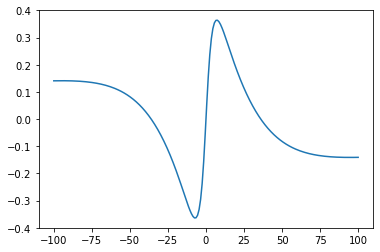

In [6]:
plt.plot(x,model(x).detach().numpy())